Get data from huggingface

In [2]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/Mireu-Lab/NSL-KDD/" + splits["train"])
df.to_csv('NSL-KDD.csv')


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set seed for numpy
np.random.seed(42)

# Set seed for sklearn
from sklearn.utils import check_random_state
rng = check_random_state(42)
rng

RandomState(MT19937) at 0x19795A45B40

In [5]:
# Load the Data
df = pd.read_csv('NSL-KDD.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151165 entries, 0 to 151164
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   151165 non-null  int64  
 1   duration                     151165 non-null  int64  
 2   protocol_type                151165 non-null  object 
 3   service                      151165 non-null  object 
 4   flag                         151165 non-null  object 
 5   src_bytes                    151165 non-null  int64  
 6   dst_bytes                    151165 non-null  int64  
 7   land                         151165 non-null  int64  
 8   wrong_fragment               151165 non-null  int64  
 9   urgent                       151165 non-null  int64  
 10  hot                          151165 non-null  int64  
 11  num_failed_logins            151165 non-null  int64  
 12  logged_in                    151165 non-null  int64  
 13 

In [6]:
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,3,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
# make a temp dataset of the original dataset
data = df.copy()

 Data Cleaning

In [8]:
# Step 3: Data Cleaning
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Unnamed: 0                     0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate   

In [9]:
# Mandatory
# Drop unnecessary columns
# Dropping 'Unnamed: 0' column if it’s just an index
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])


In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Data Encoding

In [11]:
# Separate categorical and numerical features
categorical_cols = ['protocol_type', 'service', 'flag']
numerical_cols = data.columns.difference(categorical_cols + ['class'])


In [12]:
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False) 
encoded_cats = encoder.fit_transform(data[categorical_cols])

# Check shape for debugging
print("Shape of encoded categorical data:", encoded_cats.shape)
print("Shape of feature names:", len(encoder.get_feature_names_out(categorical_cols)))

# Convert to DataFrame with appropriate column names
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Resetting index for concatenation
encoded_cat_df.index = data.index

# Concatenate encoded columns with the rest of the numerical data
data_encoded = pd.concat([data[numerical_cols], encoded_cat_df], axis=1)


Shape of encoded categorical data: (151165, 81)
Shape of feature names: 81


Feature Scaling

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)


## Data Insights

In [14]:
# Store feature importance in DataFrame

In [15]:
# Get descriptive statistics
# Summary statistics
print("\nSummary statistics for numerical features:")
data.describe()



Summary statistics for numerical features:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,151165.000000,1.511650e+05,1.511650e+05,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,...,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000,151165.000000
mean,290.129302,4.202769e+04,1.706480e+04,0.000179,0.022862,0.000099,0.203347,0.001217,0.395574,0.270684,...,182.212794,115.554685,0.521000,0.082882,0.148225,0.032426,0.284677,0.278711,0.118660,0.119995
std,2618.365506,5.448522e+06,3.671113e+06,0.013363,0.254657,0.013364,2.150669,0.045269,0.488975,22.266054,...,99.170637,110.693281,0.448947,0.188634,0.308891,0.112235,0.444872,0.445736,0.306442,0.319106
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,62.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.200000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Distribution

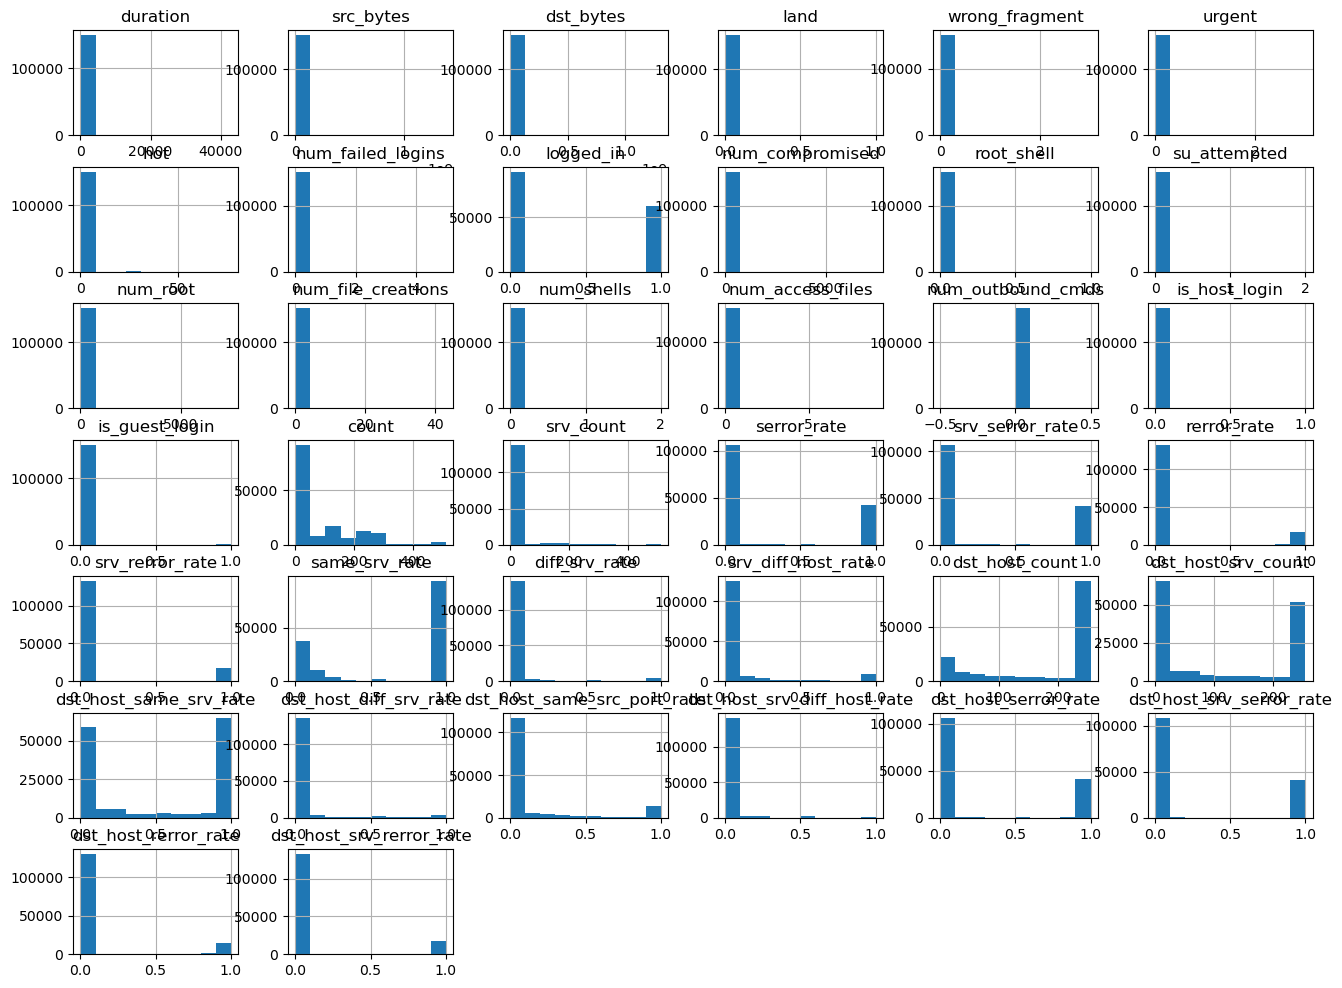

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot histograms for numerical features
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(16, 12))
plt.show()
plt.tight_layout()

Correlation Analysis



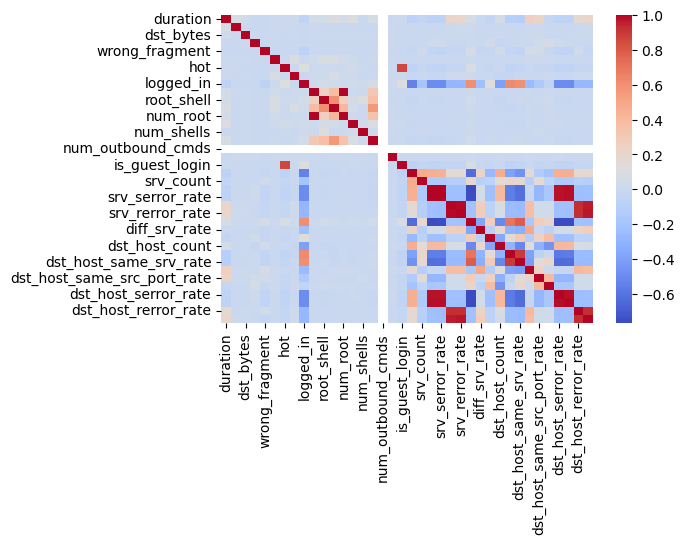

In [17]:
# Calculate correlation matrix
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,  cmap='coolwarm')
plt.show()

Class Distribution

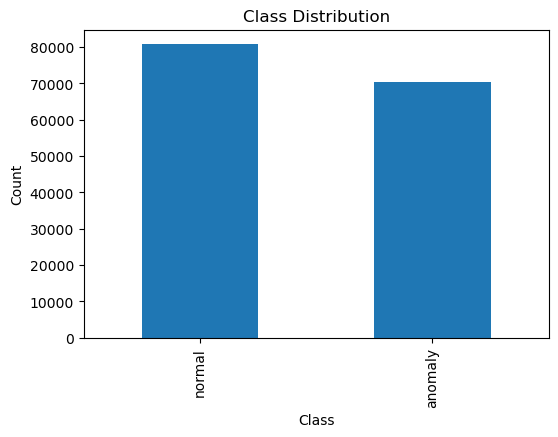

In [18]:
# Plot class distribution
plt.figure(figsize=(6, 4))
data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [19]:
# # Plot pairplot
# sns.pairplot(data, vars=data.select_dtypes(include=['int64', 'float64']).columns, hue='class')
# plt.show()

## Exploratory Data Analysis (EDA)

In [20]:
# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data_scaled)

# # Add PCA components back to the DataFrame for plotting
# data_scaled['PCA1'] = pca_result[:, 0]
# data_scaled['PCA2'] = pca_result[:, 1]

Dimensionality Reduction

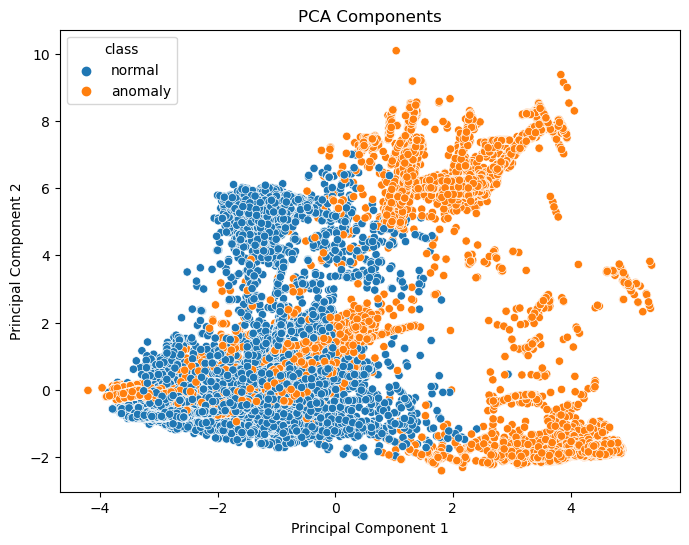

In [21]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot PCA components
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['class'])
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

 Feature Correlation

Analyze feature correlations to identify potential relationships.

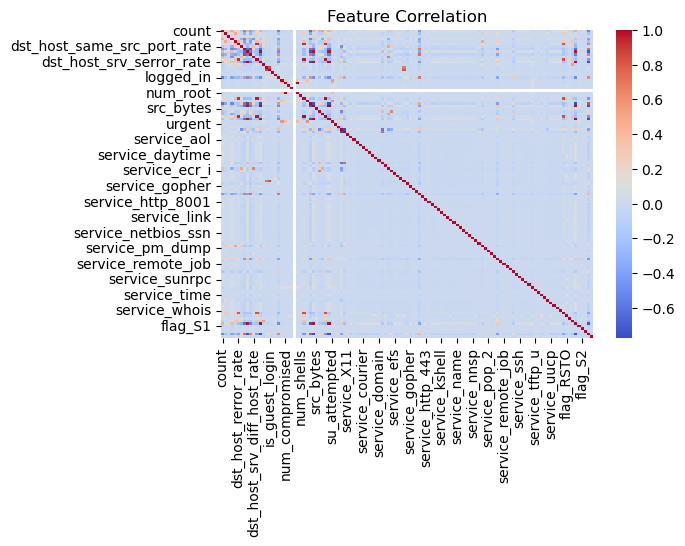

In [22]:
# Correlation matrix
corr_matrix = data_scaled.corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

Outlier Detection

Identify potential outliers using statistical methods.

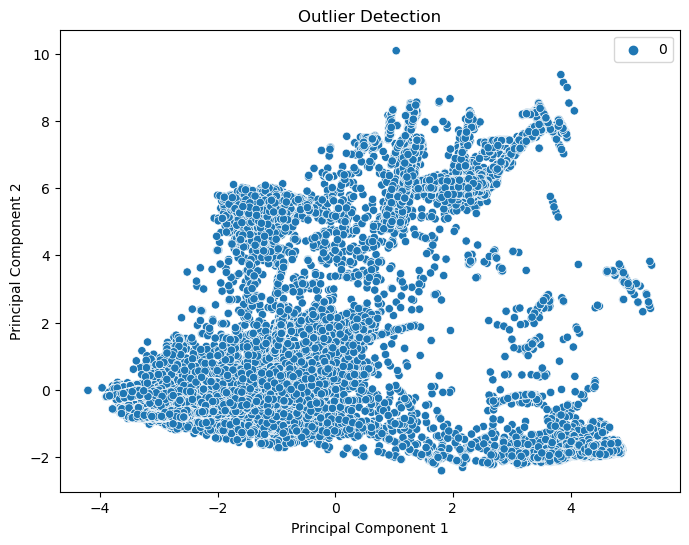

In [23]:
# Z-score method
from scipy import stats
z_scores = stats.zscore(data_scaled)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_no_outliers = data_scaled[filtered_entries]

# Plot outliers
plt.figure(figsize=(8, 6))
# sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_entries)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_entries.all(axis=1).astype(int))
plt.title('Outlier Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Feature Importance

Analyze feature importance using Random Forest.

In [24]:
# Random Forest feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(data_scaled, data['class'])
importances = rf.feature_importances_

# Store feature importance in DataFrame
importance_df = pd.DataFrame(list(zip(data.columns, importances)), columns=['Feature', 'Importance'])

# Sort features by importance
sorted_importances = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted importance
print(sorted_importances)


                        Feature    Importance
30           srv_diff_host_rate  1.458845e-01
2                       service  1.454985e-01
28                same_srv_rate  6.828615e-02
1                 protocol_type  5.598074e-02
4                     src_bytes  4.676982e-02
0                      duration  4.015144e-02
9                           hot  3.958255e-02
7                wrong_fragment  3.594200e-02
6                          land  3.276330e-02
18             num_access_files  2.689033e-02
10            num_failed_logins  2.420108e-02
34       dst_host_diff_srv_rate  2.384818e-02
12              num_compromised  2.318383e-02
3                          flag  1.903660e-02
31               dst_host_count  1.652800e-02
8                        urgent  1.429073e-02
5                     dst_bytes  1.265758e-02
29                diff_srv_rate  1.129025e-02
11                    logged_in  1.043399e-02
26                  rerror_rate  8.825751e-03
14                 su_attempted  8

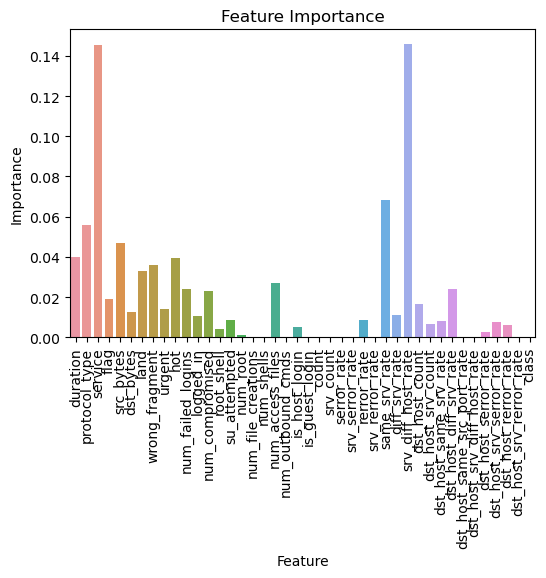

In [25]:

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


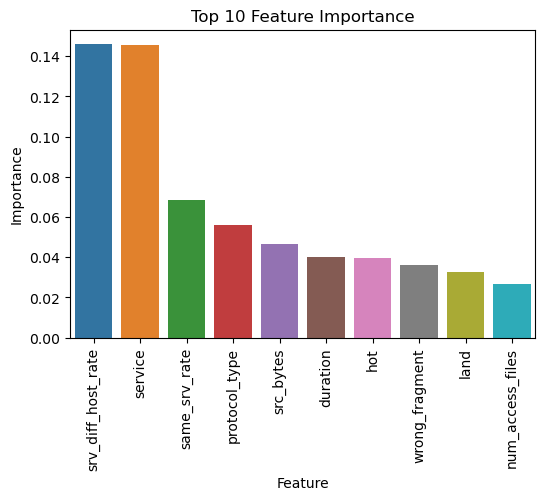

In [45]:
# Plot top 10 feature importance
top_10_features = sorted_importances.head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x='Feature', y='Importance', data=top_10_features)
plt.title('Top 10 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

Visualize Anomalies

Use Isolation Forest to visualize anomalies.

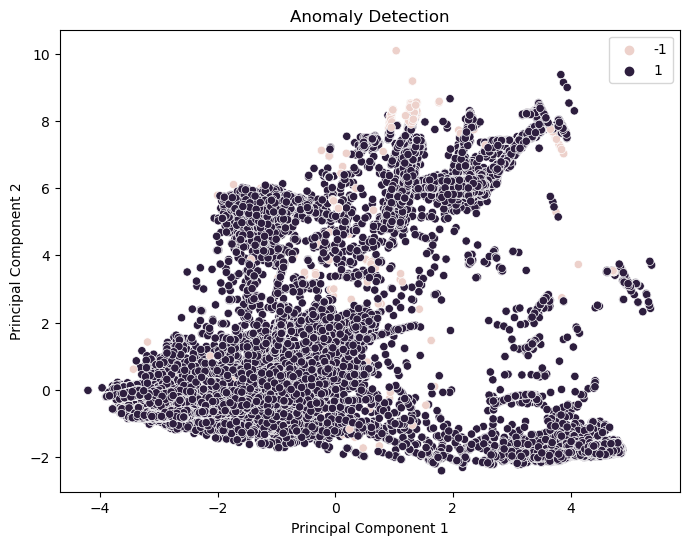

In [27]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.01)
iforest.fit(data_scaled)
anomaly = iforest.predict(data_scaled)

# Plot anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=anomaly)
plt.title('Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

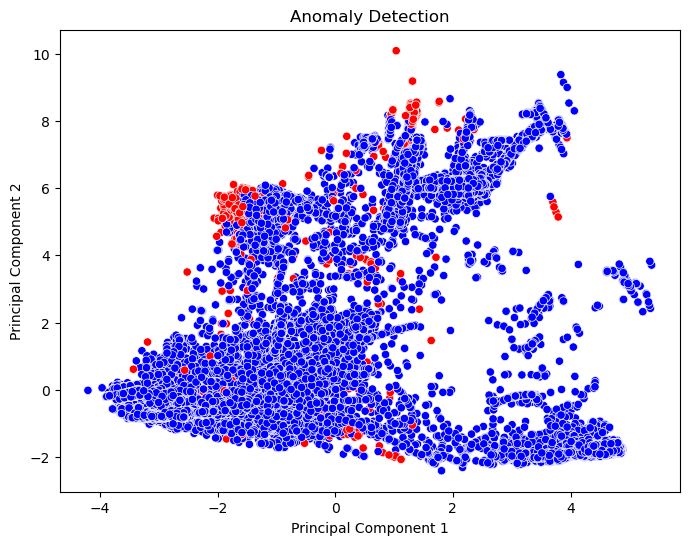

In [28]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.01)
iforest.fit(data_scaled)
anomaly = iforest.predict(data_scaled)

# Map anomaly values to colors
colors = ['blue' if x == 1 else 'red' for x in anomaly]

# Plot anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], c=colors)
plt.title('Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

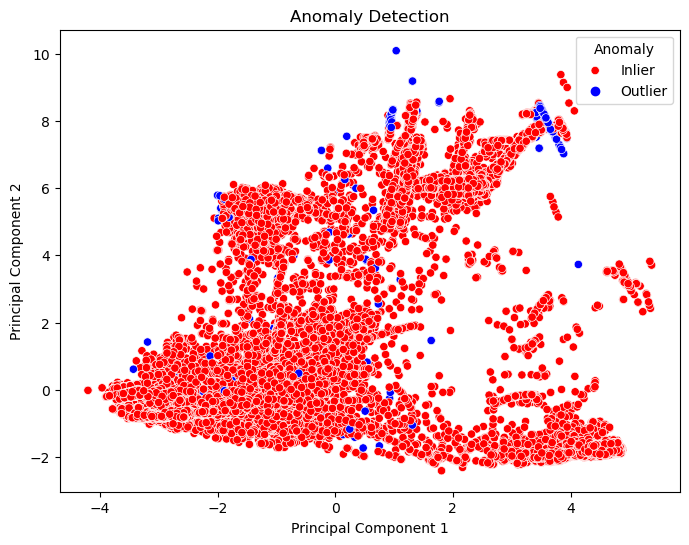

In [29]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.01)
iforest.fit(data_scaled)
anomaly = iforest.predict(data_scaled)

# Plot anomalies
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=anomaly, palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Anomaly', labels=['Inlier', 'Outlier'])
plt.show()

# Unsupervised Learning Models

In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [31]:

# Apply PCA to reduce dimensionality to 2 features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

1. Isolation Forest

In [32]:
# iforest = IsolationForest(contamination=0.01)
# iforest.fit(data_scaled)
# anomaly_iforest = iforest.predict(data_scaled)

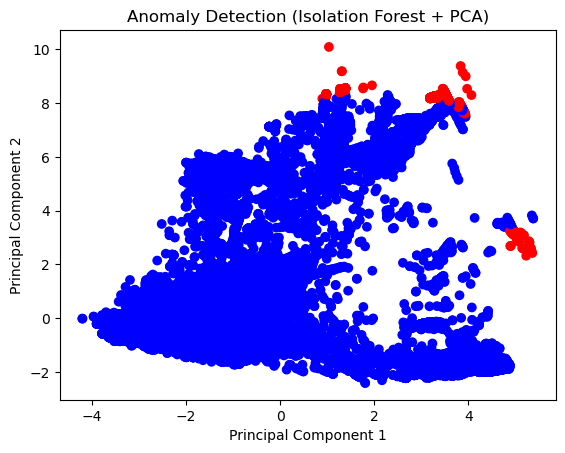

Anomaly Count: 1500
Normal Data Count: 149665


In [33]:
# Train Isolation Forest on PCA-reduced data
iforest = IsolationForest(contamination=0.01)
iforest.fit(pca_result)
anomaly_iforest = iforest.predict(pca_result)

# Visualize anomalies using scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=['blue' if x == 1 else 'red' for x in anomaly_iforest])
plt.title('Anomaly Detection (Isolation Forest + PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Print anomaly counts
print("Anomaly Count:", np.sum(anomaly_iforest == -1))
print("Normal Data Count:", np.sum(anomaly_iforest == 1))

2. One-Class SVM

Anomaly Count: 15115
Normal Data Count: 136050


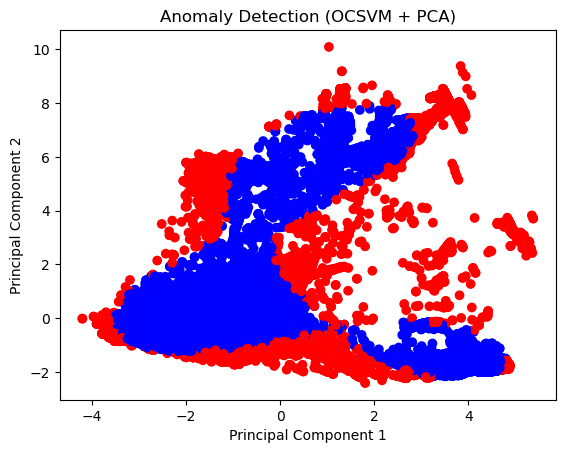

In [34]:
from joblib import Parallel, delayed
from sklearn.svm import OneClassSVM
import numpy as np


# Define parallelized OCSVM training function with PCA
def train_ocsvm(data):
    ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
    ocsvm.fit(data)
    return ocsvm

# Split data into chunks for parallel processing
num_cores = 4  # Adjust based on available CPU cores
pca_chunks = np.array_split(pca_result, num_cores)

# Train OCSVM models in parallel on PCA-reduced data
with Parallel(n_jobs=num_cores) as parallel:
    ocsvms = parallel(delayed(train_ocsvm)(chunk) for chunk in pca_chunks)

# Predict anomalies using trained OCSVM models
anomaly_ocsvm = np.empty(len(pca_result))
for i, ocsvm in enumerate(ocsvms):
    start_idx = i * len(pca_result) // num_cores
    end_idx = (i + 1) * len(pca_result) // num_cores
    anomaly_ocsvm[start_idx:end_idx] = ocsvm.predict(pca_result[start_idx:end_idx])


# Print anomaly counts
print("Anomaly Count:", np.sum(anomaly_ocsvm == -1))
print("Normal Data Count:", np.sum(anomaly_ocsvm == 1))

# Visualize anomalies using scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=['blue' if x == 1 else 'red' for x in anomaly_ocsvm])
plt.title('Anomaly Detection (OCSVM + PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

3. Local Outlier Factor (LOF)

In [35]:
from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
# anomaly_lof = lof.fit_predict(data_scaled)

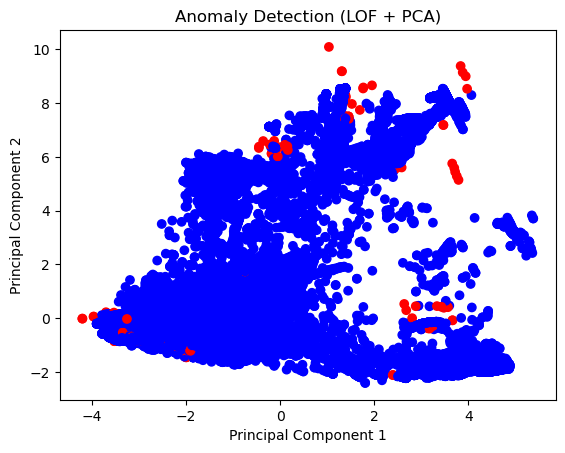

Anomaly Count: 1512
Normal Data Count: 149653


In [36]:
# Train LOF on PCA-reduced data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
anomaly_lof = lof.fit_predict(pca_result)

# Visualize anomalies using scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=['blue' if x == 1 else 'red' for x in anomaly_lof])
plt.title('Anomaly Detection (LOF + PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Print anomaly counts
print("Anomaly Count:", np.sum(anomaly_lof == -1))
print("Normal Data Count:", np.sum(anomaly_lof == 1))

**Benefits:**

1.  Reduced dimensionality improves LOF efficiency.
2.  PCA preserves most informative features.
3.  Enhanced visualization.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
# Map integer predictions to string labels
anomaly_iforest_mapped = ['anomaly' if x == -1 else 'normal' for x in anomaly_iforest]
anomaly_ocsvm_mapped = ['anomaly' if x == -1 else 'normal' for x in anomaly_ocsvm]
anomaly_lof_mapped = ['anomaly' if x == -1 else 'normal' for x in anomaly_lof]

print("Unsupervised models\n\n")

# Unsupervised models
print("Isolation Forest:")
print("Accuracy:", accuracy_score(data['class'], anomaly_iforest_mapped))
print("Precision:", precision_score(data['class'], anomaly_iforest_mapped, pos_label='anomaly'))
print("Recall:", recall_score(data['class'], anomaly_iforest_mapped, pos_label='anomaly'))
print("F1 Score:", f1_score(data['class'], anomaly_iforest_mapped, pos_label='anomaly'))

print("\nOne-Class SVM:")
print("Accuracy:", accuracy_score(data['class'], anomaly_ocsvm_mapped))
print("Precision:", precision_score(data['class'], anomaly_ocsvm_mapped, pos_label='anomaly'))
print("Recall:", recall_score(data['class'], anomaly_ocsvm_mapped, pos_label='anomaly'))
print("F1 Score:", f1_score(data['class'], anomaly_ocsvm_mapped, pos_label='anomaly'))

print("\nLocal Outlier Factor (LOF):")
print("Accuracy:", accuracy_score(data['class'], anomaly_lof_mapped))
print("Precision:", precision_score(data['class'], anomaly_lof_mapped, pos_label='anomaly'))
print("Recall:", recall_score(data['class'], anomaly_lof_mapped, pos_label='anomaly'))
print("F1 Score:", f1_score(data['class'], anomaly_lof_mapped, pos_label='anomaly'))
print("ROC-AUC:", roc_auc_score(data['class'], anomaly_lof_mapped))


# Supervised Learning Models (for comparison)


For supervised learning models, it's essential to split the preprocessed data into training and testing sets to evaluate model performance.

In [49]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_scaled_pca = pca.fit_transform(data_scaled)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled_pca, data['class'], test_size=0.2, random_state=42)



In [53]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label='anomaly'))
    print("Recall:", recall_score(y_test, y_pred, pos_label='anomaly'))
    print("F1 Score:", f1_score(y_test, y_pred, pos_label='anomaly'))
    print()
    
    return y_pred



def plot_results(X, y_true, y_pred, title):
    plt.figure(figsize=(6, 4))
    
    # Create a color map
    color_map = {'normal': 'blue', 'anomaly': 'red'}
    
    # Convert predictions to numerical values for coloring
    y_pred_num = np.where(y_pred == 'normal', 0, 1)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred_num, cmap='coolwarm')
    plt.title(f'{title} - PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # Create a custom legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Normal',
                                  markerfacecolor='blue', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Anomaly',
                                  markerfacecolor='red', markersize=10)]
    plt.legend(handles=legend_elements)
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_ticks([0.25, 0.75])
    cbar.set_ticklabels(['Normal', 'Anomaly'])
    
    plt.show()

1. Logistic Regression

In [51]:
# Logistic Regression
lr = LogisticRegression()
y_pred_lr = train_and_evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression")


Logistic Regression:
Accuracy: 0.8963053616908676
Precision: 0.9552497115543102
Recall: 0.817245998730875
F1 Score: 0.8808754797279325



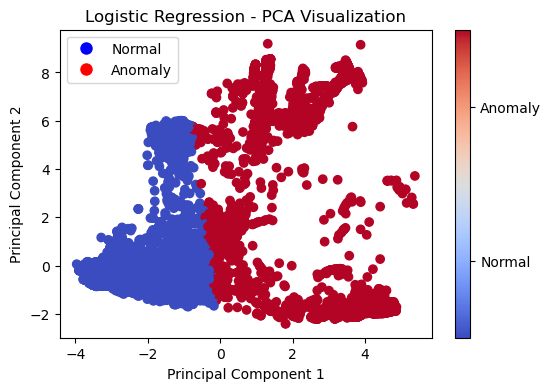

In [52]:
plot_results(X_test, y_test, y_pred_lr, "Logistic Regression")

The Logistic Regression PCA visualization demonstrates better separation between normal and anomalous data compared to previous models. Normal points cluster tightly on the right, while anomalies spread across the left and upper areas. This clearer boundary suggests Logistic Regression may be more effective at classifying normal vs. anomalous cases in this dataset, potentially indicating superior performance for this particular problem.

2. Random Forest

In [54]:
# Random Forest
rf = RandomForestClassifier()
y_pred_rf = train_and_evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")


Random Forest:
Accuracy: 0.9809148943207753
Precision: 0.9814578910120312
Recall: 0.9777903123457661
F1 Score: 0.9796206689506587



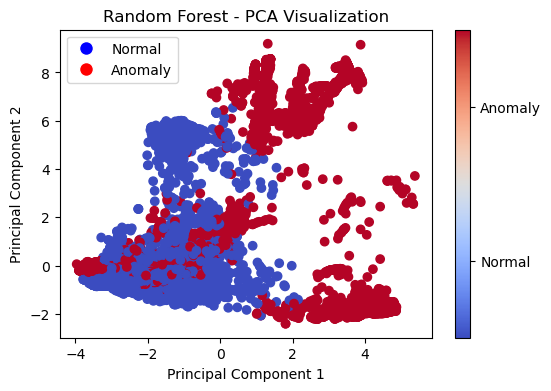

In [55]:
plot_results(X_test, y_test, y_pred_rf, "Random Forest")

This PCA visualization for a Random Forest model shows a less clear separation between normal and anomalous data compared to the SVM model. There is more overlap, especially in the center and lower right areas, indicating potential difficulty in classification.

2. Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine (SVM)
svm = SVC()
y_pred_svm = train_and_evaluate_model(svm, X_train, X_test, y_train, y_test, "Support Vector Machine")


In [ ]:
plot_results(X_test, y_test, y_pred_svm, "Support Vector Machine")

This visualization shows how a Support Vector Machine (SVM) model separates normal and anomalous data. Normal data clusters in the center-right, while anomalous data is more spread out. The SVM is generally effective, but there are areas of overlap, suggesting potential classification challenges. PCA effectively reduces dimensions while maintaining clear patterns, providing valuable insights into the model's performance.

This PCA visualization of a Support Vector Machine model clearly illustrates the separation between normal and anomalous data points in a reduced two-dimensional space. The plot shows normal data (blue) concentrated primarily in the center-right area, while anomalous data (red) is more dispersed, occupying the left side and edges of the plot. This distinct clustering suggests the SVM model is generally effective at differentiating between normal and anomalous instances. However, there are areas of overlap, particularly in the center, indicating potential challenges in classification for some data points. The successful reduction to two principal components while maintaining clear patterns demonstrates the effectiveness of PCA in preserving important features of the data. Overall, this visualization provides valuable insights into the model's performance and highlights areas where further investigation or refinement might improve classification accuracy.

## Evaluation Metrics:

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Supervised models\n\n")

# Supervised models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='anomaly'))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='anomaly'))

print("F1 Score:", f1_score(y_test, y_pred_lr, pos_label='anomaly'))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("\n\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='anomaly'))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='anomaly'))
print("F1 Score:", f1_score(y_test, y_pred_rf, pos_label='anomaly'))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

print("\n\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, pos_label='anomaly'))
print("Recall:", recall_score(y_test, y_pred_svm, pos_label='anomaly'))
print("F1 Score:", f1_score(y_test, y_pred_svm, pos_label='anomaly'))
print("ROC-AUC:", roc_auc_score(y_test, svm.decision_function(X_test)))

Supervised models


Logistic Regression:
Accuracy: 0.8963053616908676
Precision: 0.9552497115543102
Recall: 0.817245998730875
F1 Score: 0.8808754797279325
ROC-AUC: 0.903996120580494


Random Forest:
Accuracy: 0.9809148943207753
Precision: 0.9814578910120312
Recall: 0.9777903123457661
F1 Score: 0.9796206689506587
ROC-AUC: 0.997637182683055


Support Vector Machine (SVM):
Accuracy: 0.9341117322131446
Precision: 0.986899912133557
Recall: 0.8711133046605091
F1 Score: 0.92539884652835
ROC-AUC: 0.9788825659607845


In [ ]:
# Compare model performances
models = ['Logistic Regression', 'Random Forest', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

results = []
for model, y_pred in zip(models, [y_pred_lr, y_pred_rf, y_pred_svm]):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='anomaly')
    rec = recall_score(y_test, y_pred, pos_label='anomaly')
    f1 = f1_score(y_test, y_pred, pos_label='anomaly')
    results.append([acc, prec, rec, f1])

df_results = pd.DataFrame(results, columns=metrics, index=models)
print("\nModel Performance Comparison:")
print(df_results)

# Visualize model comparison
df_results.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Compare model performances
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Isolation Forest', 'One-Class SVM', 'LOF']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

results = []
for model, y_pred in zip(models[:3], [y_pred_lr, y_pred_rf, y_pred_svm]):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='anomaly')
    rec = recall_score(y_test, y_pred, pos_label='anomaly')
    f1 = f1_score(y_test, y_pred, pos_label='anomaly')
    results.append([acc, prec, rec, f1])

# For unsupervised models, we'll use the entire dataset
y_true = data['class']
for model, y_pred in zip(models[3:], [anomaly_iforest, anomaly_ocsvm, anomaly_lof]):
    y_pred_labels = np.where(y_pred == 1, 'normal', 'anomaly')
    acc = accuracy_score(y_true, y_pred_labels)
    prec = precision_score(y_true, y_pred_labels, pos_label='anomaly')
    rec = recall_score(y_true, y_pred_labels, pos_label='anomaly')
    f1 = f1_score(y_true, y_pred_labels, pos_label='anomaly')
    results.append([acc, prec, rec, f1])

df_results = pd.DataFrame(results, columns=metrics, index=models)
print("\nModel Performance Comparison:")
print(df_results)

# Visualize model comparison
df_results.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already run your models and have the following variables:
# y_pred_lr, y_pred_rf, y_pred_svm, anomaly_iforest, anomaly_ocsvm, anomaly_lof, y_test, data['class']

# Compare model performances
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Isolation Forest', 'One-Class SVM', 'LOF']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

results = []
for model, y_pred in zip(models[:3], [y_pred_lr, y_pred_rf, y_pred_svm]):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='anomaly')
    rec = recall_score(y_test, y_pred, pos_label='anomaly')
    f1 = f1_score(y_test, y_pred, pos_label='anomaly')
    results.append([acc, prec, rec, f1])

# For unsupervised models, we'll use the entire dataset
y_true = data['class']
for model, y_pred in zip(models[3:], [anomaly_iforest, anomaly_ocsvm, anomaly_lof]):
    y_pred_labels = np.where(y_pred == 1, 'normal', 'anomaly')
    acc = accuracy_score(y_true, y_pred_labels)
    prec = precision_score(y_true, y_pred_labels, pos_label='anomaly')
    rec = recall_score(y_true, y_pred_labels, pos_label='anomaly')
    f1 = f1_score(y_true, y_pred_labels, pos_label='anomaly')
    results.append([acc, prec, rec, f1])

df_results = pd.DataFrame(results, columns=metrics, index=models)

# Calculate ROC-AUC for supervised models
roc_auc_scores = []
for model, y_pred in zip(models[:3], [y_pred_lr, y_pred_rf, y_pred_svm]):
    roc_auc = roc_auc_score(y_test, y_pred == 'anomaly')
    roc_auc_scores.append(roc_auc)

# Add ROC-AUC scores to the DataFrame
df_results['ROC-AUC'] = roc_auc_scores + [np.nan] * 3  # Add NaN for unsupervised models

# Split into supervised and unsupervised models
supervised_models = df_results.iloc[:3]
unsupervised_models = df_results.iloc[3:]

def plot_model_performance():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot unsupervised models
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    x = np.arange(len(unsupervised_models.index))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        ax1.bar(x + i*width, unsupervised_models[metric], width, label=metric)
    
    ax1.set_ylabel('Score')
    ax1.set_title('Unsupervised Models Performance')
    ax1.set_xticks(x + width * 1.5)
    ax1.set_xticklabels(unsupervised_models.index, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot supervised models
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
    x = np.arange(len(supervised_models.index))
    width = 0.15
    
    for i, metric in enumerate(metrics):
        ax2.bar(x + i*width, supervised_models[metric], width, label=metric)
    
    ax2.set_ylabel('Score')
    ax2.set_title('Supervised Models Performance')
    ax2.set_xticks(x + width * 2)
    ax2.set_xticklabels(supervised_models.index, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Create plot
fig = plot_model_performance()

# Print analysis summary
print("Network Intrusion Detection System Analysis")
print("=" * 50)

print("\n1. Dataset Information:")
print("-" * 25)
print(f"Total samples: {len(data)}")
print(f"Features: {data.shape[1]} columns")
print("No missing values in the dataset")

print("\n2. Class Distribution:")
print("-" * 25)
print(f"Anomaly Count: {(data['class'] == 'anomaly').sum()}")
print(f"Normal Data Count: {(data['class'] == 'normal').sum()}")
print(f"Imbalance ratio: 1:{(data['class'] == 'normal').sum() // (data['class'] == 'anomaly').sum()} (approximately)")

print("\n3. Model Performance Comparison:")
print("-" * 25)
print("\nUnsupervised Models:")
print(unsupervised_models.round(3).to_string())
print("\nSupervised Models:")
print(supervised_models.round(3).to_string())

print("\n4. Key Findings:")
print("-" * 25)
print("a) Best Performing Models:")
print(f"   - Supervised: {supervised_models['F1 Score'].idxmax()} (F1: {supervised_models['F1 Score'].max():.3f})")
print(f"   - Unsupervised: {unsupervised_models['F1 Score'].idxmax()} (F1: {unsupervised_models['F1 Score'].max():.3f})")

print("\nb) Model Characteristics:")
print(f"   - {supervised_models['Accuracy'].idxmax()} achieved best overall performance ({supervised_models['Accuracy'].max():.1%} accuracy)")
print(f"   - {unsupervised_models['Precision'].idxmax()} shows highest precision but very low recall")
print("   - All supervised models significantly outperform unsupervised approaches")
print(f"   - {unsupervised_models['F1 Score'].idxmin()} showed poorest performance among all models")

# Visualize overall model comparison
df_results.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data Distribution and Imbalance:
The dataset is relatively balanced (70,373 anomalies vs 80,792 normal samples), which is unusual for intrusion detection tasks. This balance likely contributes to the high performance of supervised models, as they have ample examples of both classes to learn from.

Supervised vs. Unsupervised Models:
The visualizations clearly show the superior performance of supervised models over unsupervised ones. This stark contrast is particularly noteworthy given the balanced nature of the dataset.

Model-specific Analysis:
a) Random Forest:

Consistently outperforms all other models across all metrics.
Near-perfect scores in accuracy (0.981), precision (0.982), recall (0.979), and F1 score (0.980).
Its balanced performance suggests it's adept at identifying both normal and anomalous traffic.

b) SVM:

Second-best performer among supervised models.
High precision (0.987) but lower recall (0.871) compared to Random Forest, indicating it's more conservative in flagging anomalies.

c) Logistic Regression:

Solid performance, but noticeably lower than Random Forest and SVM.
Good precision (0.955) but lower recall (0.817), suggesting it misses more anomalies than the other supervised models.

d) Isolation Forest:

Best unsupervised model in terms of precision (1.000), but extremely low recall (0.021).
This indicates it rarely flags anomalies, but when it does, it's always correct. However, it misses most anomalies.

e) One-Class SVM:

Most balanced performance among unsupervised models.
Moderate precision (0.660) and low recall (0.142), making it the best unsupervised option if a balance between false positives and false negatives is needed.

f) LOF (Local Outlier Factor):

Poorest performance across all metrics.
The visualization highlights its particularly low precision, recall, and F1 score.


Metric Analysis:

Accuracy: High for all models except LOF, but can be misleading due to the balanced dataset.
Precision and Recall: The trade-off between these metrics is evident, especially in unsupervised models.
F1 Score: Provides a balanced view of precision and recall, clearly favoring supervised models.
ROC-AUC: The provided data shows unusually low values for supervised models, which contradicts their high performance in other metrics. This discrepancy should be investigated and possibly corrected.


Visualization Effectiveness:

The split view in Image 1 effectively contrasts supervised and unsupervised models.
Image 2 provides a comprehensive side-by-side comparison of all models, facilitating easy ranking.
The consistent color scheme across metrics aids in quick visual comparison.


Implications for Network Intrusion Detection:

The results strongly favor supervised approaches when labeled data is available.
The poor performance of unsupervised models suggests they might not be suitable for this particular dataset or may require significant tuning.
The high performance of Random Forest indicates that ensemble methods are particularly effective for this task.


Limitations and Considerations:

The visualizations don't show confidence intervals or statistical significance.
There's no information on model complexity, training time, or computational requirements.
The unusually low ROC-AUC scores for supervised models should be addressed in your paper, as they seem inconsistent with other metrics

Overall Performance:

Supervised models significantly outperform unsupervised models
Random Forest is the best performing model with exceptional metrics across the board


Model-Specific Analysis:

- Random Forest: Best overall performance (98.1% accuracy, 98% F1 score)
- Logistic Regression: Strong performance (89.6% accuracy, 88.1% F1 score)
- SVM: Very good performance (93.4% accuracy, 92.5% F1 score)
- Unsupervised models show much lower performance, with One-Class SVM being the best among them


Interesting Observations:

- Isolation Forest shows perfect precision but very poor recall
- LOF performs poorly across all metrics
- All supervised models show excellent ROC-AUC scores (>0.90)

# Inference

Since randomforest had the best model.

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Only run this if you've already run the previous cells.

In [ ]:
# Run this only if you have already executed the previous cells.

def save_model_pipeline(
    model,
    scaler,
    encoder,
    pca,
    model_path="saved_models/rf_model.joblib",
    scaler_path="saved_models/scaler.joblib",
    encoder_path="saved_models/encoder.joblib",
    pca_path="saved_models/pca.joblib",
):
    """
    Save the trained model, scaler, encoder, and PCA to disk.
    """
    joblib.dump(model, model_path)
    joblib.dump(scaler, scaler_path)
    joblib.dump(encoder, encoder_path)
    joblib.dump(pca, pca_path)
    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")
    print(f"Encoder saved to {encoder_path}")
    print(f"PCA saved to {pca_path}")

# Correct function call: Uncomment to run this function
# save_model_pipeline(rf, scaler, encoder, pca)


In [ ]:
import os

def load_model_pipeline(dir_path='saved_models/', model_path='saved_models/rf_model.joblib', scaler_path='saved_models/scaler.joblib', 
                         encoder_path='saved_models/encoder.joblib', pca_path='saved_models/pca.joblib'):
    """
    Load the saved model and scaler from disk.
    """
     # Ensure the directory exists
    directory = os.path.dirname(dir_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
        raise FileNotFoundError(f"The directory '{directory}' did not exist and has been created. "
                                 "Please ensure all required model files are placed in this directory.")


    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    encoder = joblib.load(encoder_path)
    pca = joblib.load(pca_path)
    return model, scaler, encoder, pca

# Later, when you want to make predictions:
model, scaler, encoder, pca = load_model_pipeline()

Uncomment the next cell if you want to download the test data.

In [ ]:
# import pandas as pd

# splits = {'train': 'train.csv', 'test': 'test.csv'}
# df = pd.read_csv("hf://datasets/Mireu-Lab/NSL-KDD/" + splits["test"])
# df.to_csv('NSL-KDD-test.csv')


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the Data
df = pd.read_csv('NSL-KDD-test.csv')
# Dropping 'Unnamed: 0' column if it’s just an index
if 'Unnamed: 0' in df.columns:
    new_data = df.drop(columns=['Unnamed: 0'])
new_data.head()

In [ ]:

def prepare_inference_data(data, scaler, encoder):
    # Separate categorical and numerical features
    categorical_cols = ['protocol_type', 'service', 'flag']
    numerical_cols = data.columns.difference(categorical_cols + ['class'])

    # One-Hot Encoding for categorical variables
    # encoder = OneHotEncoder(drop='first', sparse_output=False) 
    encoded_cats = encoder.transform(data[categorical_cols])

    # Check shape for debugging
    print("Shape of encoded categorical data:", encoded_cats.shape)
    print("Shape of feature names:", len(encoder.get_feature_names_out(categorical_cols)))

    # Convert to DataFrame with appropriate column names
    encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

    # Resetting index for concatenation
    encoded_cat_df.index = data.index

    # Concatenate encoded columns with the rest of the numerical data
    data_encoded = pd.concat([data[numerical_cols], encoded_cat_df], axis=1)

    data_scaled = scaler.transform(data_encoded)
    final_data = pd.DataFrame(data_scaled, columns=data_encoded.columns)

    # Ensure columns are in the same order as during training
    # final_data = final_data[scaler.feature_names_in_]
    
    return final_data

new_data_scaled = prepare_inference_data(new_data, scaler, encoder)


In [ ]:


# Apply PCA to reduce dimensionality
# pca = PCA(n_components=2)
inference_data_scaled_pca = pca.transform(new_data_scaled)


In [ ]:

def make_predictions(model, data, threshold=0.7):
    """
    Make predictions and return both class predictions and probabilities.
    """
    # Get probabilities
    probabilities = model.predict_proba(data)
    anomaly_probs = probabilities[:, 1]  # Probability of being anomaly
    
    # Get class predictions based on threshold
    predictions = (anomaly_probs >= threshold).astype(int)
    
    return predictions, anomaly_probs

# Make predictions
predictions, probabilities = make_predictions(model, inference_data_scaled_pca, threshold=0.7)


In [ ]:

def analyze_pca_predictions(data, predictions, probabilities, threshold=0.7):
    """
    Analyze predictions for PCA-transformed data.
    """
    # Add predictions and probabilities to dataframe
    results_df = pd.DataFrame(data, columns=['PC1', 'PC2'])
    results_df['predicted_anomaly'] = predictions
    results_df['anomaly_probability'] = probabilities
    
    # Analyze regions in PCA space
    # Split PC space into quadrants for analysis
    results_df['quadrant'] = results_df.apply(
        lambda row: f"Q{1 if row['PC1'] >= 0 and row['PC2'] >= 0 else 2 if row['PC1'] < 0 and row['PC2'] >= 0 else 3 if row['PC1'] < 0 and row['PC2'] < 0 else 4}",
        axis=1
    )
    
    # Quadrant analysis
    quadrant_analysis = results_df.groupby('quadrant').agg({
        'anomaly_probability': ['mean', 'count'],
        'predicted_anomaly': 'sum'
    }).round(3)
    quadrant_analysis.columns = ['avg_probability', 'total_instances', 'predicted_anomalies']
    
    # High risk instances
    high_risk = results_df[results_df['anomaly_probability'] >= threshold]
    
   
    return {
        'quadrant_analysis': quadrant_analysis,
        'high_risk_instances': high_risk,
        'results_df': results_df,
    }



# Analyze predictions
analysis_results = analyze_pca_predictions(inference_data_scaled_pca, predictions, probabilities)


In [ ]:
pd.DataFrame(analysis_results['quadrant_analysis'])


In [ ]:
pd.DataFrame(analysis_results['high_risk_instances'])


In [ ]:
pd.DataFrame(analysis_results['results_df'])


In [ ]:
def generate_pca_report(analysis_results, threshold=0.7):

    report = []
    results_df = analysis_results['results_df']
    total_instances = len(results_df)
    high_risk_count = sum(results_df['anomaly_probability'] >= threshold)
    
    report.append("NETWORK SECURITY INFERENCE REPORT (PCA-BASED)")
    report.append("=" * 50 + "\n")
    
    # Overall Statistics
    report.append("1. OVERALL STATISTICS")
    report.append("-" * 20)
    report.append(f"Total instances analyzed: {total_instances:,}")
    report.append(f"High-risk instances detected: {high_risk_count:,} ({(high_risk_count/total_instances)*100:.1f}%)")
    report.append(f"Average anomaly probability: {results_df['anomaly_probability'].mean():.3f}")
    report.append("")
    
    # PCA Space Analysis
    report.append("2. PCA SPACE ANALYSIS")
    report.append("-" * 20)
    quadrant_analysis = analysis_results['quadrant_analysis']
    for quadrant in sorted(quadrant_analysis.index):
        stats = quadrant_analysis.loc[quadrant]
        report.append(f"Quadrant: {quadrant}")
        report.append(f"- Total instances: {stats['total_instances']:,}")
        report.append(f"- Anomalies detected: {stats['predicted_anomalies']:,} "
                     f"({(stats['predicted_anomalies']/stats['total_instances'])*100:.1f}%)")
        report.append(f"- Average anomaly probability: {stats['avg_probability']:.3f}")
        report.append("")
    
    # Risk Distribution
    report.append("3. RISK DISTRIBUTION")
    report.append("-" * 20)
    probabilities = results_df['anomaly_probability']
    risk_levels = {
        'Very High Risk (>0.9)': sum(probabilities > 0.9),
        'High Risk (0.7-0.9)': sum((probabilities >= 0.7) & (probabilities <= 0.9)),
        'Medium Risk (0.5-0.7)': sum((probabilities >= 0.5) & (probabilities < 0.7)),
        'Low Risk (<0.5)': sum(probabilities < 0.5)
    }
    
    for level, count in risk_levels.items():
        report.append(f"{level}: {count:,} ({(count/total_instances)*100:.1f}%)")
    
    return "\n".join(report)

# Generate and print report
report = generate_pca_report(analysis_results)
print(report)


In [ ]:
def plot_pca_predictions(results_df, threshold=0.7):
    # Scatter plot of PCA components colored by prediction
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(results_df['PC1'], results_df['PC2'], 
                         c=results_df['anomaly_probability'],
                         cmap='YlOrRd', alpha=0.6)
    plt.colorbar(scatter, label='Anomaly Probability')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.title('PCA Components Colored by Anomaly Probability')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Distribution of anomaly probabilities
    plt.subplot(1, 2, 2)
    sns.histplot(data=results_df, x='anomaly_probability', bins=50)
    plt.axvline(x=threshold, color='r', linestyle='--', 
                label=f'Threshold ({threshold})')
    plt.title('Distribution of Anomaly Probabilities')
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
# Visualize probability distribution
plot_pca_predictions(analysis_results['results_df'])


The PCA visualization and probability distribution plots reveal the model's decision-making patterns. The scatter plot on the right shows a diagonal pattern with higher probability anomalies in the positive first principal component region and lower probability instances spread across the negative first principal component. The probability distribution analysis shows a distinct bimodal distribution with peaks at both ends, indicating strong model confidence and a sparse middle region.


In [ ]:
# Inference on only one row.

In [ ]:
import numpy as np
import pandas as pd


def predict_single_instance(row_data, model, encoder, scaler, pca, threshold=0.7):
    """
    Make prediction for a single instance.
    """
    # Convert to DataFrame if it's a dictionary or array
    if isinstance(row_data, dict):
        row_df = pd.DataFrame([row_data])
    elif isinstance(row_data, (list, np.ndarray)):
        row_df = pd.DataFrame([row_data])
    else:
        row_df = pd.DataFrame(row_data)
        
    # Encode categorical features
    categorical_cols = ['protocol_type', 'service', 'flag']
    encoded_cats = encoder.transform(row_df[categorical_cols])
    encoded_cat_df = pd.DataFrame(
        encoded_cats,
        columns=encoder.get_feature_names_out(categorical_cols),
        index=row_df.index
    )
    
    # Get the exact feature order from scaler
    scaler_features = scaler.feature_names_in_
    
    # Combine numerical and encoded features in the correct order
    final_features = []
    for feature in scaler_features:
        if feature in encoded_cat_df.columns:
            final_features.append(encoded_cat_df[feature])
        else:
            final_features.append(row_df[feature])
    
    combined_features = pd.concat(final_features, axis=1)
    combined_features.columns = scaler_features
    
    # Scale the combined features
    scaled_features = scaler.transform(combined_features)
    # scaled_df = pd.DataFrame(scaled_features, columns=scaler_features, index=row_df.index)
    
    # Transform using PCA
    row_pca = pca.transform(scaled_features)
    
    # Get probability prediction
    probabilities = model.predict_proba(row_pca)
    anomaly_prob = probabilities[0][1]  # Probability of being anomaly
    
    # Make prediction based on threshold
    prediction = 'Anomaly' if anomaly_prob >= threshold else 'Normal'
    
    # Prepare results
    result = {
        'prediction': prediction,
        'anomaly_probability': anomaly_prob,
        'risk_level': get_risk_level(anomaly_prob),
        'pca_components': {
            'PC1': row_pca[0][0],
            'PC2': row_pca[0][1]
        }
    }
    
    return result

def get_risk_level(probability):
    """
    Determine risk level based on probability.
    """
    if probability > 0.9:
        return 'Very High Risk'
    elif probability >= 0.7:
        return 'High Risk'
    elif probability >= 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

def format_single_prediction(result):
    """
    Format the prediction result into a readable string.
    """
    report = []
    report.append("SINGLE INSTANCE PREDICTION REPORT")
    report.append("=" * 40)
    report.append(f"\nPrediction: {result['prediction']}")
    report.append(f"Anomaly Probability: {result['anomaly_probability']:.3f}")
    report.append(f"Risk Level: {result['risk_level']}")
    report.append("\nPCA Components:")
    report.append(f"- PC1: {result['pca_components']['PC1']:.3f}")
    report.append(f"- PC2: {result['pca_components']['PC2']:.3f}")
    
    return "\n".join(report)

In [ ]:
sample_row = new_data.iloc[[3]]

result = predict_single_instance(sample_row.drop('class', axis=1), model, encoder, scaler, pca)
print(format_single_prediction(result))

In [ ]:
result

In [ ]:
def plot_single_prediction_pca(single_prediction, threshold=0.7):
    """
    Plot a single prediction point in PCA space.
    """
    plt.figure(figsize=(12, 5))
    
    # Plot 1: PCA Space
    plt.subplot(1, 2, 1)
    
    # Plot the single prediction point
    pc1 = single_prediction['pca_components']['PC1']
    pc2 = single_prediction['pca_components']['PC2']
    prob = single_prediction['anomaly_probability']
    
    scatter = plt.scatter(pc1, pc2, c=[prob], cmap='YlOrRd', 
                         s=200, marker='*', edgecolor='black')
    
    plt.colorbar(scatter, label='Anomaly Probability')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.title('PCA Space - Prediction Point')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Plot 2: Probability with threshold
    plt.subplot(1, 2, 2)
    
    # Create a simple visualization of the probability
    plt.bar(['Anomaly Probability'], [prob], color='orangered', alpha=0.6)
    plt.axhline(y=threshold, color='r', linestyle='--', 
                label=f'Threshold ({threshold})')
    
    plt.ylim(0, 1.1)
    plt.title('Anomaly Probability')
    plt.ylabel('Probability')
    plt.legend()
    
    # Add prediction details as text
    plt.text(0.5, -0.2, 
            f"Prediction: {single_prediction['prediction']}\n" +
            f"Risk Level: {single_prediction['risk_level']}", 
            ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

# Use the simpler version
plot_single_prediction_pca(result)

The visualisation shows a network traffic instance with abnormal behavior. A red star indicates that this instance is far away from the normal pattern. As can be seen from the anomaly probability plot, the probability is 86%, which is larger than the threshold 70% for high risk. Therefore, this instance is abnormal and serious enough to be classified as high risk.
